In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
from misc import *
import pickle


Traj loaded 
ppp: 500
periods: 100
method: euler
itraj: 1
Unphyisical (testing): True


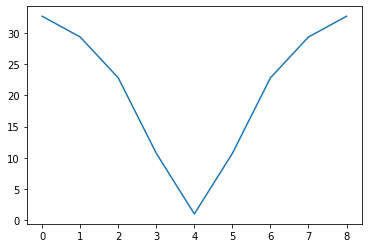

In [16]:
periods = 100
ppp = 500
itraj = 1

dt=1/ppp

method="euler"
unphysical = True
path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/{}".format(periods,ppp,itraj,method)
if unphysical is True:
    path_landscape +="unphysical_"

states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method=method, unphysical=True)
#states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params
[A,C,D] = build_matrix_from_params(params)

losses_ =  np.load(path_landscape+"losses.npy")
omegas_ =  np.load(path_landscape+"omegas.npy")
gammas_ =  np.load(path_landscape+"gammas.npy")
cuts_ =  np.load(path_landscape+"cuts.npy")

sstates =pickle.load(open(path_landscape+"sstates.pickle",'rb'))

plt.plot(losses_[:,0,-1])

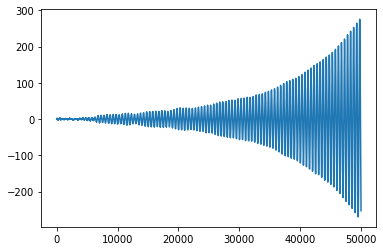

In [17]:
plt.plot(states[:,0])

Traj loaded 
ppp: 1000
periods: 50
method: euler
itraj: 1
Unphyisical (testing): True


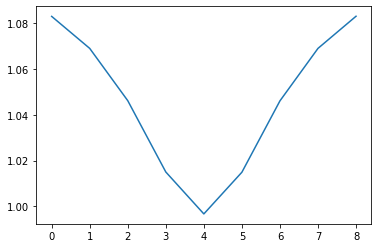

In [14]:
periods = 50
ppp = 1000
itraj = 1

dt=1/ppp

method="euler"
unphysical = True
path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/{}".format(periods,ppp,itraj,method)
if unphysical is True:
    path_landscape +="unphysical_"

states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method=method, unphysical=True)
#states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params
[A,C,D] = build_matrix_from_params(params)

losses_ =  np.load(path_landscape+"losses.npy")
omegas_ =  np.load(path_landscape+"omegas.npy")
gammas_ =  np.load(path_landscape+"gammas.npy")
cuts_ =  np.load(path_landscape+"cuts.npy")

sstates =pickle.load(open(path_landscape+"sstates.pickle",'rb'))

plt.plot(losses_[:,0,-1])

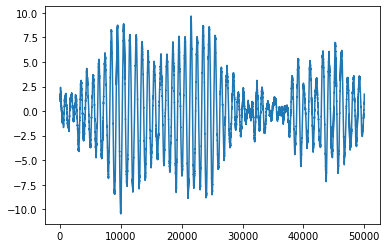

In [15]:
plt.plot(states[:,0])

Oooo

Traj loaded 
ppp: 1000
periods: 100
method: euler
itraj: 1
Unphyisical (testing): True


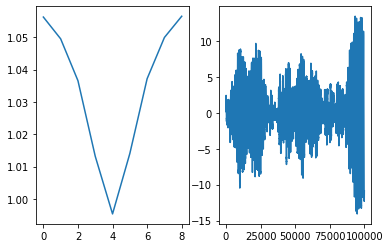

In [20]:
periods = 100
ppp = 1000
itraj = 1

dt=1/ppp

method="euler"
unphysical = True
path_landscape=get_def_path()+"{}periods/{}ppp/{}/cost_landscape/{}".format(periods,ppp,itraj,method)
if unphysical is True:
    path_landscape +="unphysical_"

states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method=method, unphysical=True)
#states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params
[A,C,D] = build_matrix_from_params(params)

losses_ =  np.load(path_landscape+"losses.npy")
omegas_ =  np.load(path_landscape+"omegas.npy")
gammas_ =  np.load(path_landscape+"gammas.npy")
cuts_ =  np.load(path_landscape+"cuts.npy")

sstates =pickle.load(open(path_landscape+"sstates.pickle",'rb'))

plt.subplot(121)
plt.plot(losses_[:,0,-1])
plt.subplot(122)
plt.plot(states[:,0])

In [140]:
symplectic = np.array([[0,1],[-1,0]])
e = np.pi/10
parameters = np.arange(0,4*np.pi + e,e)
predictions, Sstates = {t:[] for t in range(len(parameters))},{t:[[states[0], covs[0]]] for t in range(len(parameters))}

xi = lambda cov: np.dot(cov, C.T) + D.T

give_pred = lambda state: np.dot(C,state)*dt
def evolve_state(Sstates, AA, dy):
    x, cov = Sstates
    XiCov = xi(cov)
    dx = np.dot(AA - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(AA,cov) + np.dot(cov, ct(AA)) + D - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]


for dy in tqdm(signals):
    for i in range(len(parameters)):
        predictions[i].append(give_pred(Sstates[i][-1][0]))
        Sstates[i].append(evolve_state(Sstates[i][-1], parameters[i]*symplectic, dy))
        
landscape = {}
cut_series = np.logspace(2,np.log10(len(signals)),20)
for length_series in tqdm(cut_series):
    losses = []
    length_series = int(length_series)
    sigs = signals[:length_series]

    for i in range(len(parameters)):
        preds = np.array(predictions[i])[:length_series]
        losses.append(np.sum(np.square(preds - sigs))/(2*dt*length_series))
    
    landscape[length_series] = losses

100%|██████████| 20/20 [00:33<00:00,  1.68s/it]


Text(0, 0.5, '$C(\\omega, \\tilde{\\omega})$')

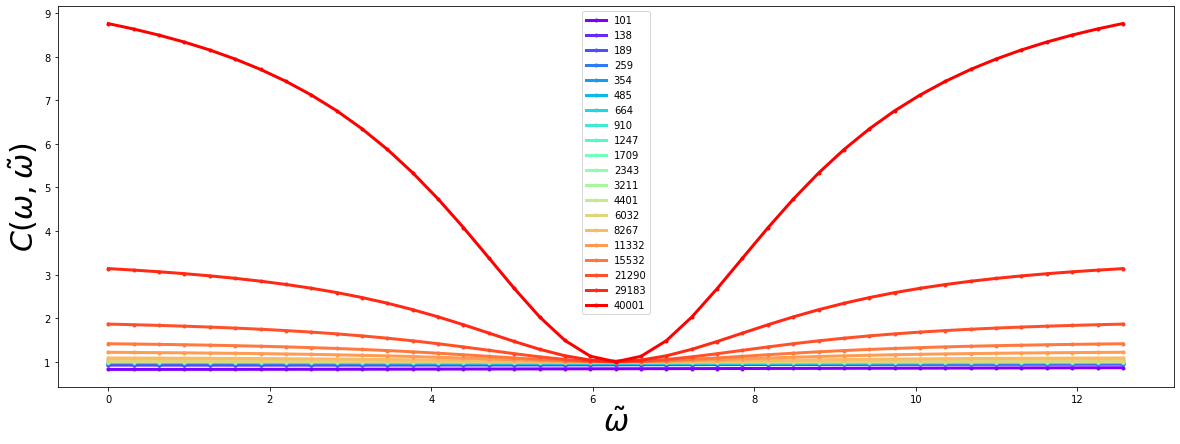

In [144]:
plt.figure(figsize=(20,7))
colors = plt.get_cmap("rainbow")
ax = plt.subplot2grid((1,1),(0,0))
for ind,p in enumerate(landscape.values()):
    plt.plot(parameters,p, color=colors(np.linspace(0,1,len(landscape)))[ind], marker='.', label="{}".format(int(np.round(cut_series[ind]+1,0))),linewidth=3)
plt.legend()
plt.xlabel(r'$\tilde{\omega}$',size=30)
plt.ylabel(r'$C(\omega, \tilde{\omega})$',size=30)

Integrate with Euler

In [132]:

states, covs, signals, params, times = load_data(ppp=ppp, periods=periods, method="euler", unphysical=True)
#states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params
[A,C,D] = build_matrix_from_params(params)



symplectic = np.array([[0,1],[-1,0]])
e = np.pi
parameters = np.arange(0,4*np.pi + e,e)
predictions, Sstates = {t:[] for t in range(len(parameters))},{t:[[states[0], covs[0]]] for t in range(len(parameters))}

xi = lambda cov: np.dot(cov, C.T) + D.T

give_pred = lambda state: np.dot(C,state)*dt
def evolve_state(Sstates, AA, dy):
    x, cov = Sstates
    XiCov = xi(cov)
    dx = np.dot(AA - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(AA,cov) + np.dot(cov, ct(AA)) + D - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]


for dy in tqdm(signals):
    for i in range(len(parameters)):
        predictions[i].append(give_pred(Sstates[i][-1][0]))
        Sstates[i].append(evolve_state(Sstates[i][-1], parameters[i]*symplectic, dy))
        
landscape = {}
cut_series = np.logspace(2,np.log10(len(signals)),20)
for length_series in tqdm(cut_series):
    losses = []
    length_series = int(length_series)
    sigs = signals[:length_series]

    for i in range(len(parameters)):
        preds = np.array(predictions[i])[:length_series]
        losses.append(np.sum(np.square(preds - sigs))/(2*dt*length_series))
    
    landscape[length_series] = losses

Traj loaded 
ppp: 1000
periods: 100
method: euler
itraj: 1
Unphyisical (testing): True


100%|██████████| 20/20 [00:11<00:00,  1.80it/s]


Text(0, 0.5, '$C(\\omega, \\tilde{\\omega})$')

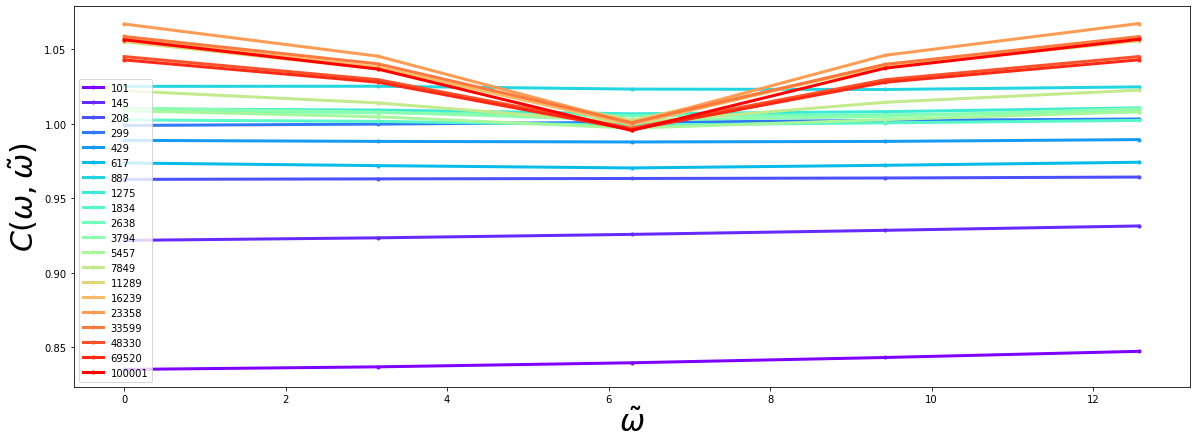

In [133]:
plt.figure(figsize=(20,7))
colors = plt.get_cmap("rainbow")
ax = plt.subplot2grid((1,1),(0,0))
for ind,p in enumerate(landscape.values()):
    plt.plot(parameters,p, color=colors(np.linspace(0,1,len(landscape)))[ind], marker='.', label="{}".format(int(np.round(cut_series[ind]+1,0))),linewidth=3)
plt.legend()
plt.xlabel(r'$\tilde{\omega}$',size=30)
plt.ylabel(r'$C(\omega, \tilde{\omega})$',size=30)